## 15.2- Caso de Estudio - Clasificación

### 15.2.1.- Cargar el dataset

Carga load_digits desde sklearn.datasets y luego metelo en un objeto

In [1]:
from sklearn.datasets import load_digits

Imprime la descripcion del dataset

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

Checa el target de tu nuevo objeto digitos

In [4]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Ahora prueba revisando la forma del arreglo digitos

In [5]:
digits.data.shape

(1797, 64)

Y la forma del arreglo target

In [6]:
digits.target.shape

(1797,)

Vamos revisando la imagen 15 del arreglo... no es lo que esperas

In [7]:
digits.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

y ahora veamos el .data para ver el arreglo en 1x64

In [8]:
digits.data[15]

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

### 15.2.2.- Visualizar los datos

Veamos los datos utilizando matplotlib, comienza importando esta libreria

In [9]:
import matplotlib.pyplot as plt

Ahor adibuja una cuadricula para lograr tu cometido

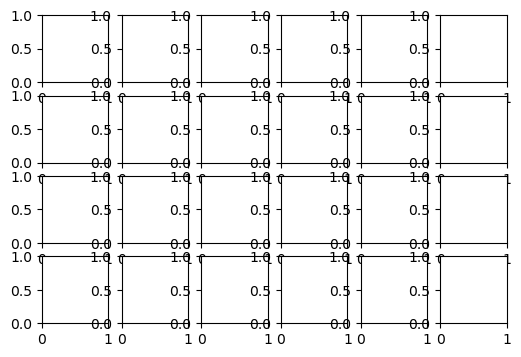

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(6,4))

a continuación, vamos a usar un for paraiterar en paralelo a traves de los 24 cuadritos y traer las priemras 24 imagenes

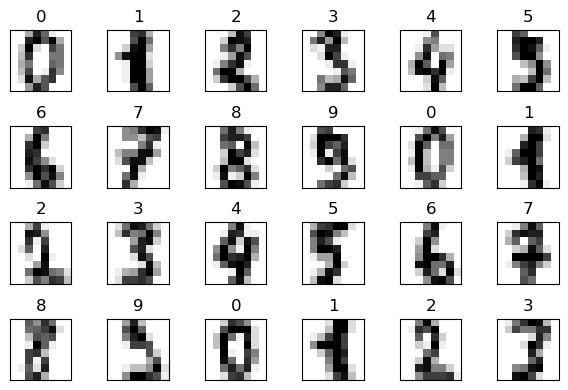

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()

### 15.2.3.- Separar el dataset para entrenamientos y pruebas

ok, ahora vamos a importar train_test_split desde sklearn.model_selection

In [12]:
from sklearn.model_selection import train_test_split

Y a continuación generar el split entre test y train

In [13]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

Veamos las shapes de nuestros sets para X (muestras)

In [14]:
x_train.shape

(1347, 64)

In [15]:
x_test.shape

(450, 64)

### 15.2.4.- Crear el modelo

Ahora importamos el KNeighborsClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

y armamos un objeto llamado KNN de este Clasificador

In [17]:
knn = KNeighborsClassifier()

### 15.2.5.- Entrenar el modelo

Ahora arma el método fit para cargar los datos en el estimador

In [18]:
knn.fit(X=x_train, y=y_train)

KNeighborsClassifier()

### 15.2.6.- Predecir clases de dígitos

Arma un objeto llamdo prediccion

In [19]:
prediccion = knn.predict(X=x_test)

Arma un objeto llamado esperado

In [20]:
esperado = y_test

Comparemos predicho vs esperado

In [21]:
prediccion[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [22]:
esperado[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

armamos una comprension de lista para localizar todas las predicciones incorrectas

In [23]:
x = [(p,e) for (p,e) in zip(prediccion, esperado) if p != e]

In [24]:
x

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## 15.3 Clasificación parte 2 - Dataset de digitos

### 15.3.1.- Metricas para la exactitud del modelo

Usa knn.score para conocer que tan bien se desempeño tu estimador

In [25]:
print(f'{knn.score(x_test, y_test):.2%}')

97.78%


Ahora vamos a ahacer una matriz de confusion para ver los hits y misses para una clase dada, llama la funcion matriz de confusión desde sklearn metricsModule

In [26]:
from sklearn.metrics import confusion_matrix

Y ahora armar tu matriz de confusion

In [27]:
confusion = confusion_matrix(y_true=esperado, y_pred=prediccion)

Checa los resultados

In [28]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

Ahora sigue un reporte de calsificación, importa classification_report desde sklearn.metrics

In [29]:
from sklearn.metrics import classification_report

Y ahora crea una comprension de lista que nos de los nombres de los digitos

In [30]:
nombres = [str(nombre) for nombre in digits.target_names]

In [31]:
nombres

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Y termina haciendo tu reporte de clasificacion

In [32]:
print(classification_report(y_true=esperado, y_pred=prediccion, target_names=nombres))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Y ahora ahremos un heatmap con la matriz de confusion

In [33]:
import pandas as pd

In [34]:
confusion_df = pd.DataFrame(confusion)

In [35]:
confusion_df

0   1   2   3   4   5   6   7   8   9
0  45   0   0   0   0   0   0   0   0   0
1   0  45   0   0   0   0   0   0   0   0
2   0   0  54   0   0   0   0   0   0   0
3   0   0   0  42   0   1   0   1   0   0
4   0   0   0   0  49   0   0   1   0   0
5   0   0   0   0   0  38   0   0   0   0
6   0   0   0   0   0   0  42   0   0   0
7   0   0   0   0   0   0   0  45   0   0
8   0   1   1   2   0   0   0   0  39   1
9   0   0   0   0   1   0   0   0   1  41

In [36]:
import seaborn as sns

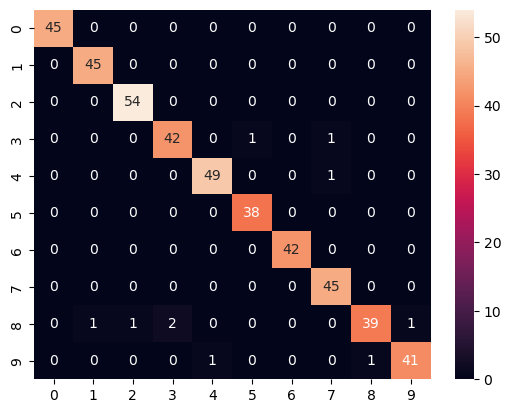

In [37]:
axes = sns.heatmap(confusion_df, annot=True)

### 15.3.2.- K-Fold Validación Cruzada

Importa kfold desde sklearn.modelselection

In [38]:
from sklearn.model_selection import KFold

Crea tu primer objeto kfold

In [39]:
kfold = KFold(n_splits=20, shuffle=True, random_state=11)

Ahora importa cross_val_score

In [40]:
from sklearn.model_selection import cross_val_score

Y crea un objeto llamado puntuacion para probar tu modelo

In [41]:
puntuacion = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

Checa los resultados

In [42]:
puntuacion

array([0.98888889, 0.97777778, 0.98888889, 1.        , 0.97777778,
       1.        , 0.97777778, 0.98888889, 1.        , 0.97777778,
       1.        , 0.98888889, 0.96666667, 0.98888889, 0.97777778,
       0.98888889, 1.        , 1.        , 1.        , 0.97752809])

In [43]:
puntuacion.mean()

0.9883208489388267

In [44]:
puntuacion.std()

0.01024188217132169

### 15.3.3.- Varios Modelos hasta dar con el bueno

Importa SVC y GaussianNB

In [45]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Crea los estimadores en un diccionario

In [46]:
estimadores = {"KNeighborsClassifier":knn, "SVC":SVC(gamma="scale"), "GuassianNB":GaussianNB()}

Ejecuta los modelos con un for

In [47]:
for nombre_estimador, objeto_estimador in estimadores.items():
    kfold = KFold(n_splits=20, random_state=11, shuffle=True)
    puntuacion = cross_val_score(estimator=objeto_estimador, X=digits.data, y=digits.target, cv=kfold)
    print(f'{nombre_estimador:>20} - ' + f'Promedio = {puntuacion.mean():.2%} | ' + f'Desviación estandar = {puntuacion.std():.2%}')

KNeighborsClassifier - Promedio = 98.83% | Desviación estandar = 1.02%
                 SVC - Promedio = 98.78% | Desviación estandar = 1.22%
          GuassianNB - Promedio = 84.30% | Desviación estandar = 4.35%


### 15.3.3.- Ajustar Hiperparametros

Ajusta el hiperparametro para ver si alguno nos da mejor exactitud

In [48]:
for k in range(1,20,2):
    kfold = KFold(n_splits=20, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    puntuacion = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k = {k:<2} - ' + f'Promedio = {puntuacion.mean():.2%} | ' + f'Desviación estandar = {puntuacion.std():.2%}')

k = 1  - Promedio = 98.83% | Desviación estandar = 0.96%
k = 3  - Promedio = 98.78% | Desviación estandar = 1.16%
k = 5  - Promedio = 98.83% | Desviación estandar = 1.02%
k = 7  - Promedio = 98.50% | Desviación estandar = 1.23%
k = 9  - Promedio = 98.39% | Desviación estandar = 1.25%
k = 11 - Promedio = 98.39% | Desviación estandar = 1.14%
k = 13 - Promedio = 98.16% | Desviación estandar = 1.18%
k = 15 - Promedio = 98.11% | Desviación estandar = 1.37%
k = 17 - Promedio = 97.66% | Desviación estandar = 1.27%
k = 19 - Promedio = 97.61% | Desviación estandar = 1.43%


## 15.4 Series de tiempo y simple regresión lineal

Importa pandas si no lo has hecho, carga los datos de casas

In [49]:
import pandas as pd

In [50]:
kchouse = pd.read_csv('kc_house_data.csv')

Dale nombre a las columnas del dataframe

In [51]:
kchouse.columns=['AreaFT', 'PreciosUSD']

Muestra los primeros 20 datos

In [52]:
kchouse.head(20)

AreaFT  PreciosUSD
0     1180    221900.0
1     2570    538000.0
2      770    180000.0
3     1960    604000.0
4     1680    510000.0
5     5420   1230000.0
6     1715    257500.0
7     1060    291850.0
8     1780    229500.0
9     1890    323000.0
10    3560    662500.0
11    1160    468000.0
12    1430    310000.0
13    1370    400000.0
14    1810    530000.0
15    2950    650000.0
16    1890    395000.0
17    1600    485000.0
18    1200    189000.0
19    1250    230000.0

usemos train test split para training y pruebas

In [53]:
X_train, X_test, y_train, y_test = train_test_split(kchouse.AreaFT.values.reshape(-1,1), kchouse.PreciosUSD.values, random_state=11)

Chequemos los tamaños de train y test

In [54]:
X_train.shape

(16209, 1)

In [55]:
X_test.shape

(5404, 1)

importa LinearRegression de sklearn

In [56]:
from sklearn.linear_model import LinearRegression

Arma el estimador y haz el fit

In [57]:
reglin = LinearRegression()

In [58]:
reglin.fit(X=X_train, y=y_train)

LinearRegression()

Obten el Coef y el INtercept

In [59]:
reglin.coef_

array([283.3312025])

In [60]:
reglin.intercept_

-47648.88872213871

Probemos el modelo, crea los objetos prediccion y esperado

In [61]:
prediccion = reglin.predict(X_test)

In [62]:
esperado = y_test

Arma un ciclo que muestre p vs e para los datos de 5 en 5

In [63]:
for pred, esp in zip(prediccion[::200], esperado[::200]):
    print(f'Predicción: {pred:.2f}, Esperado: {esp:.2f}, Variación: {(pred-esp)/esp:.2%}')

Predicción: 264015.43, Esperado: 343566.00, Variación: -23.15%
Predicción: 623846.06, Esperado: 530000.00, Variación: 17.71%
Predicción: 510513.58, Esperado: 499000.00, Variación: 2.31%
Predicción: 295748.53, Esperado: 340000.00, Variación: -13.02%
Predicción: 221515.75, Esperado: 137000.00, Variación: 61.69%
Predicción: 660679.12, Esperado: 646000.00, Variación: 2.27%
Predicción: 884510.77, Esperado: 775000.00, Variación: 14.13%
Predicción: 584179.69, Esperado: 334950.00, Variación: 74.41%
Predicción: 349014.79, Esperado: 230000.00, Variación: 51.75%
Predicción: 298015.18, Esperado: 940000.00, Variación: -68.30%
Predicción: 533180.08, Esperado: 353500.00, Variación: 50.83%
Predicción: 638012.62, Esperado: 380000.00, Variación: 67.90%
Predicción: 538846.70, Esperado: 880000.00, Variación: -38.77%
Predicción: 445347.40, Esperado: 580000.00, Variación: -23.22%
Predicción: 402847.72, Esperado: 274000.00, Variación: 47.02%
Predicción: 419847.60, Esperado: 610000.00, Variación: -31.17%
Pred

Vamos a predecir precios de casas usando area en sqft

In [64]:
predice = (lambda x: reglin.coef_ * x + reglin.intercept_)

In [65]:
predice(770)

array([170516.13720049])

In [66]:
predice(1160)

array([281015.30617429])

Y ahora visaulizemos la regresion lineal con seaborn

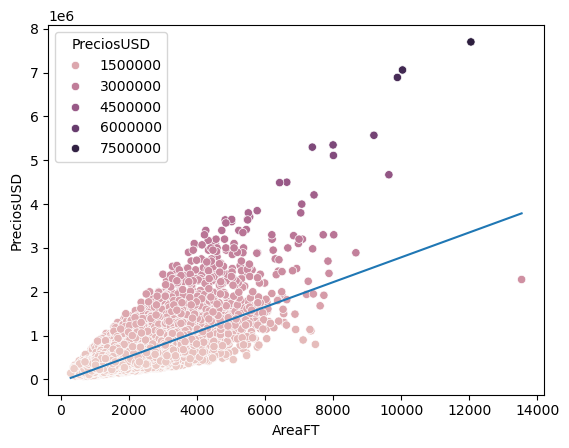

In [67]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=kchouse, x='AreaFT', y='PreciosUSD', hue='PreciosUSD')

x = np.array([min(kchouse.AreaFT.values), max(kchouse.AreaFT.values)])
y = predice(x)

line = plt.plot(x,y)

## 15.5 Regresion lineal multiple con los datos de California

### 15.5.1 Cargar el dataset

In [68]:
from sklearn.datasets import fetch_california_housing

In [69]:
california = fetch_california_housing()

In [70]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [71]:
california.data.shape

(20640, 8)

In [72]:
california.target.shape

(20640,)

In [73]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### 15.5.2 Explorar los datos

Importa Pandas si no lo has hecho, altera las precisiones a 4, max columns a 9 y display width a none

In [74]:
import pandas as pd

In [75]:
pd.set_option("display.precision", 4)

Carga los datos de california en un dataframe

In [76]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)

Agrega el target de california al mismo dataframe como una columna (Serie) adicional

In [77]:
california_df['ValorCasa'] = pd.Series(california.target)

In [78]:
california_filtrado = california_df

for column in list(california_df.columns):
    Q1 = california_df[column].quantile(q=0.25)
    Q3 = california_df[column].quantile(q=0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    california_filtrado = california_filtrado[(california_filtrado[column] > lower_bound) & (california_filtrado[column] < upper_bound)]

Checa el head de california

In [79]:
california_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0    6.9841     1.0238       322.0    2.5556     37.88   
1  8.3014      21.0    6.2381     0.9719      2401.0    2.1098     37.86   
2  7.2574      52.0    8.2881     1.0734       496.0    2.8023     37.85   
3  5.6431      52.0    5.8174     1.0731       558.0    2.5479     37.85   
4  3.8462      52.0    6.2819     1.0811       565.0    2.1815     37.85   

   Longitude  ValorCasa  
0    -122.23      4.526  
1    -122.22      3.585  
2    -122.24      3.521  
3    -122.25      3.413  
4    -122.25      3.422

Hagamos un describe para ver que onda

In [80]:
california_df.describe()

MedInc    HouseAge    AveRooms   AveBedrms  Population    AveOccup  \
count  20640.0000  20640.0000  20640.0000  20640.0000  20640.0000  20640.0000   
mean       3.8707     28.6395      5.4290      1.0967   1425.4767      3.0707   
std        1.8998     12.5856      2.4742      0.4739   1132.4621     10.3860   
min        0.4999      1.0000      0.8462      0.3333      3.0000      0.6923   
25%        2.5634     18.0000      4.4407      1.0061    787.0000      2.4297   
50%        3.5348     29.0000      5.2291      1.0488   1166.0000      2.8181   
75%        4.7432     37.0000      6.0524      1.0995   1725.0000      3.2823   
max       15.0001     52.0000    141.9091     34.0667  35682.0000   1243.3333   

         Latitude   Longitude   ValorCasa  
count  20640.0000  20640.0000  20640.0000  
mean      35.6319   -119.5697      2.0686  
std        2.1360      2.0035      1.1540  
min       32.5400   -124.3500      0.1500  
25%       33.9300   -121.8000      1.1960  
50%       34.2600   -118.4900      1.7970  
75%       37.7100   -118.0100      2.6472  
max       41.9500   -114.3100      5.0000

In [81]:
california_filtrado.describe()

MedInc    HouseAge    AveRooms   AveBedrms  Population    AveOccup  \
count  16310.0000  16310.0000  16310.0000  16310.0000  16310.0000  16310.0000   
mean       3.6578     29.4483      5.1558      1.0472   1271.5551      2.8651   
std        1.4444     12.1947      1.0435      0.0666    627.0848      0.6249   
min        0.5360      1.0000      2.0327      0.8660      5.0000      1.1613   
25%        2.5615     19.0000      4.4260      1.0027    814.0000      2.4370   
50%        3.4947     30.0000      5.1426      1.0437   1160.0000      2.8149   
75%        4.5831     38.0000      5.8505      1.0887   1636.7500      3.2451   
max        8.0113     52.0000      8.4529      1.2395   3131.0000      4.5607   

         Latitude   Longitude   ValorCasa  
count  16310.0000  16310.0000  16310.0000  
mean      35.6712   -119.6272      1.9274  
std        2.1407      1.9951      0.9439  
min       32.5400   -124.3500      0.1500  
25%       33.9400   -121.8200      1.1850  
50%       34.2900   -118.6100      1.7750  
75%       37.7300   -118.0300      2.4940  
max       41.9500   -114.5700      4.8220

### 15.5.3 Visualizar los datos

Vamos a armar un muestreo del 10% del dataset para ver mas facil las visualizaciones

In [82]:
muestradf = california_df.sample(frac=0.1, random_state=17)

Importa Matplotlib

In [83]:
import matplotlib.pyplot as plt

IMporta Seaborn

In [84]:
import seaborn as sns

Cambia la fuente de seaborn

In [85]:
sns.set(font_scale = 1)

Ponlo tipo Whitegrid

In [86]:
sns.set_style('whitegrid')

Arma graficas de precio vs cada feature

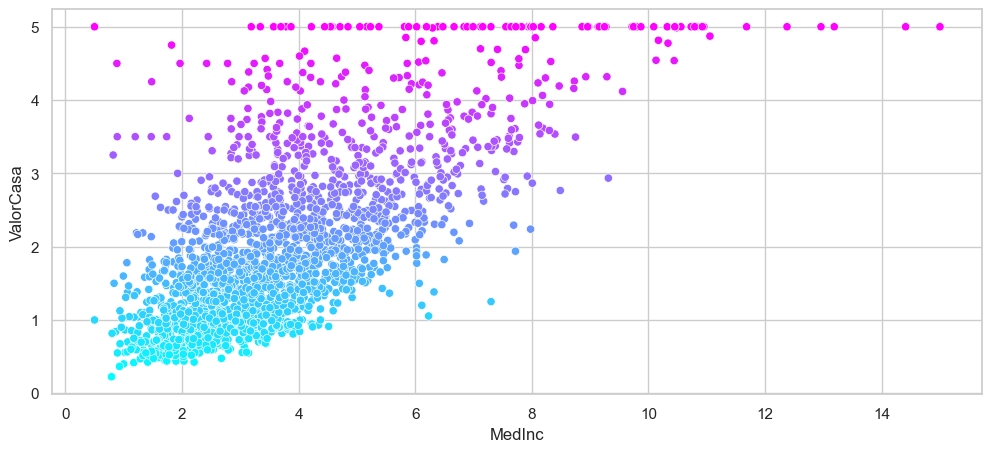

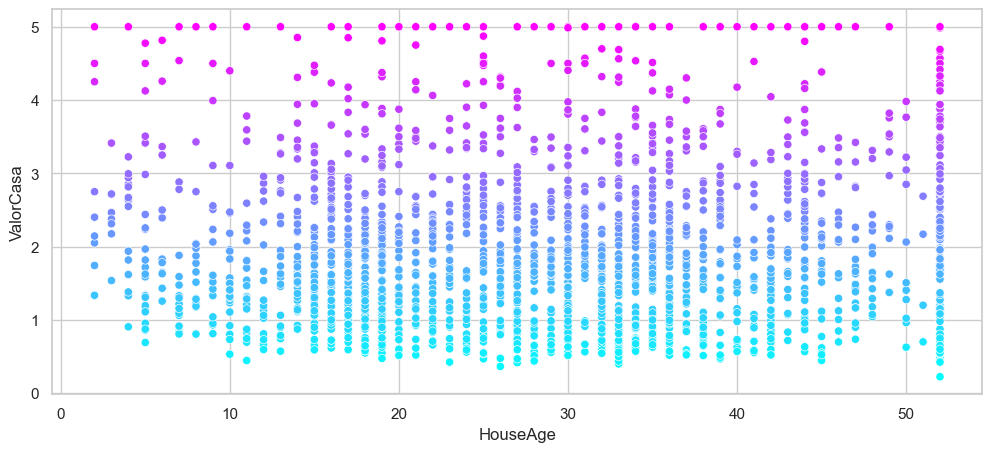

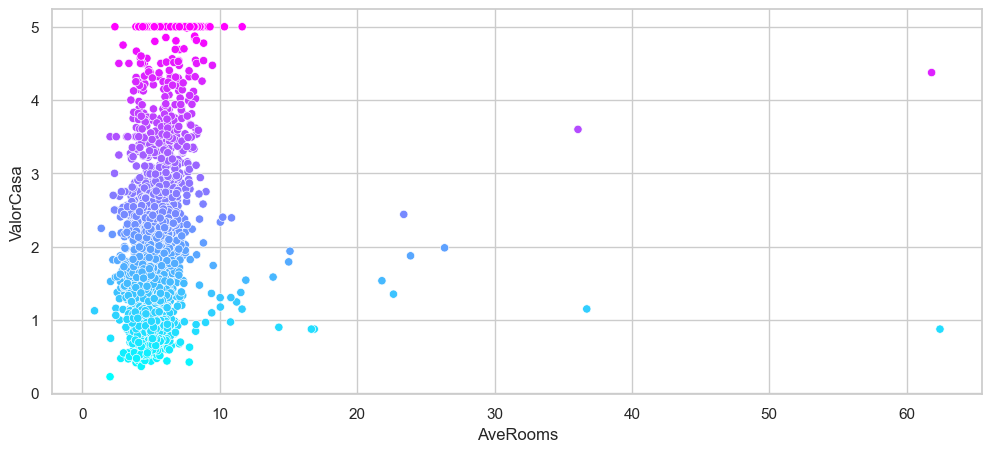

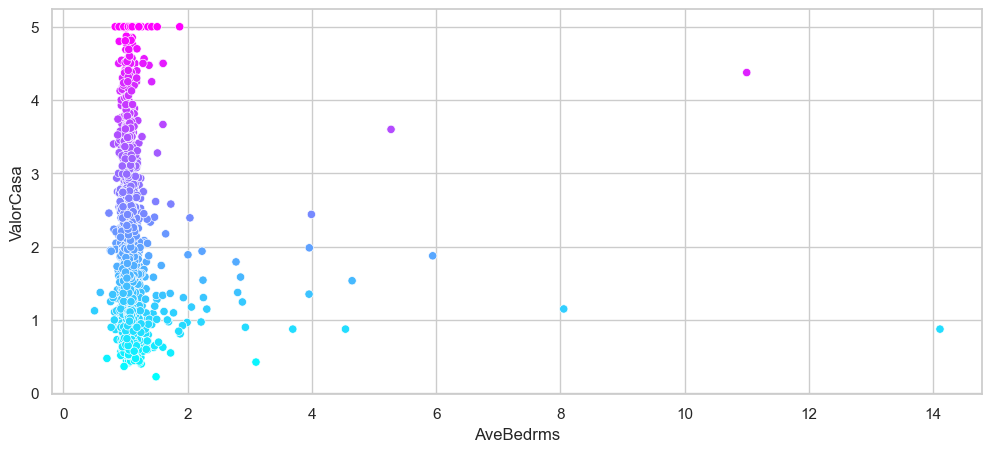

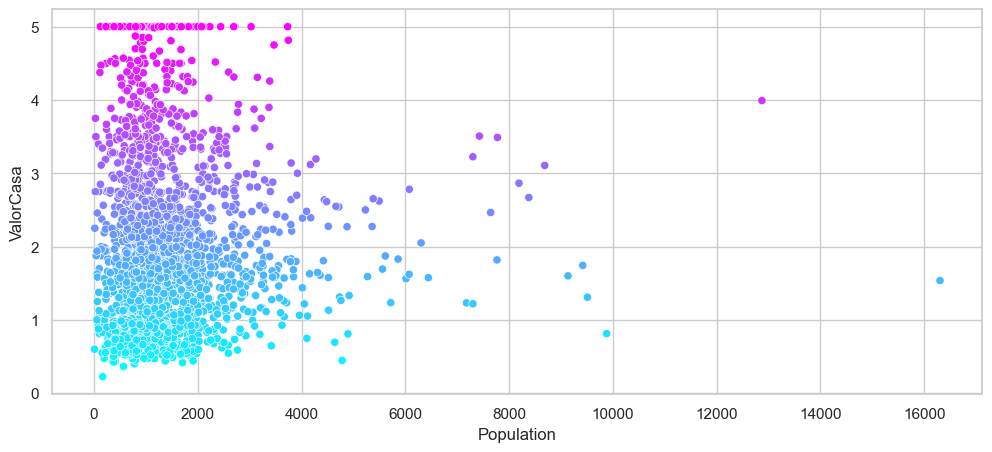

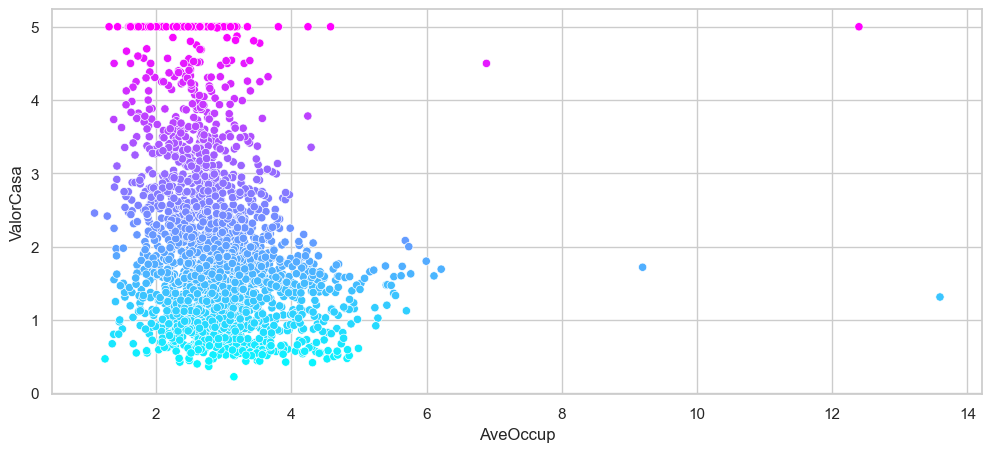

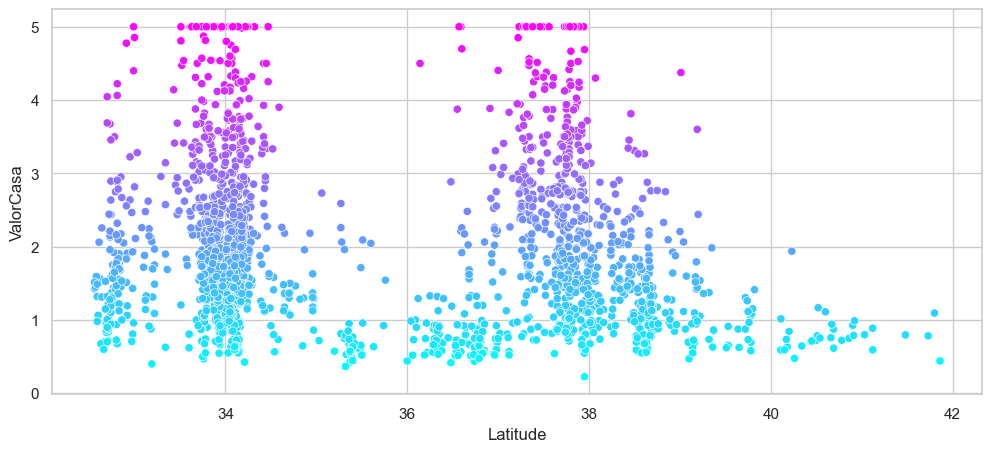

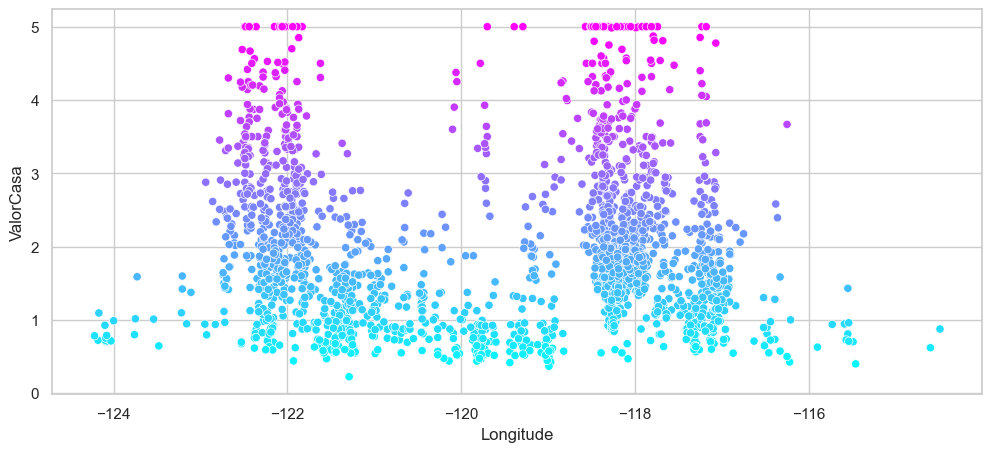

In [87]:
for feature in california.feature_names:
    plt.figure(figsize=(12,5))
    sns.scatterplot(data=muestradf, x=feature, y='ValorCasa', hue='ValorCasa', palette='cool', legend=False)

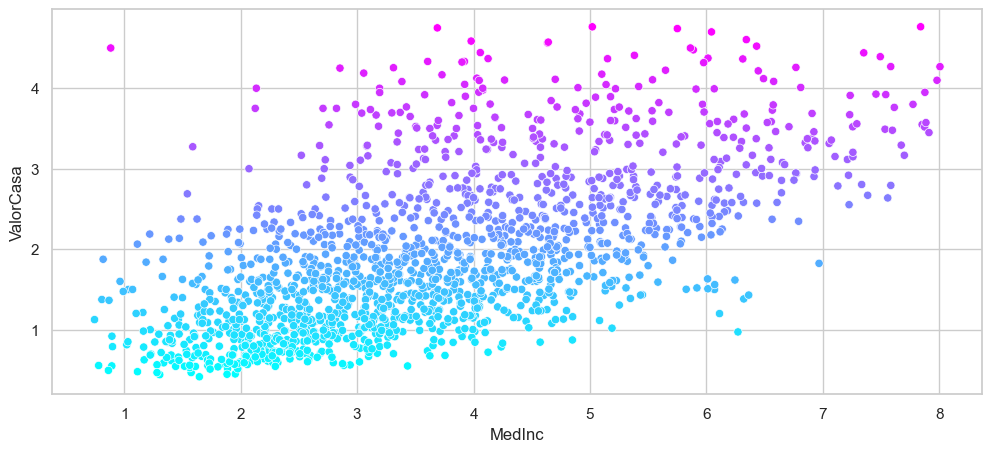

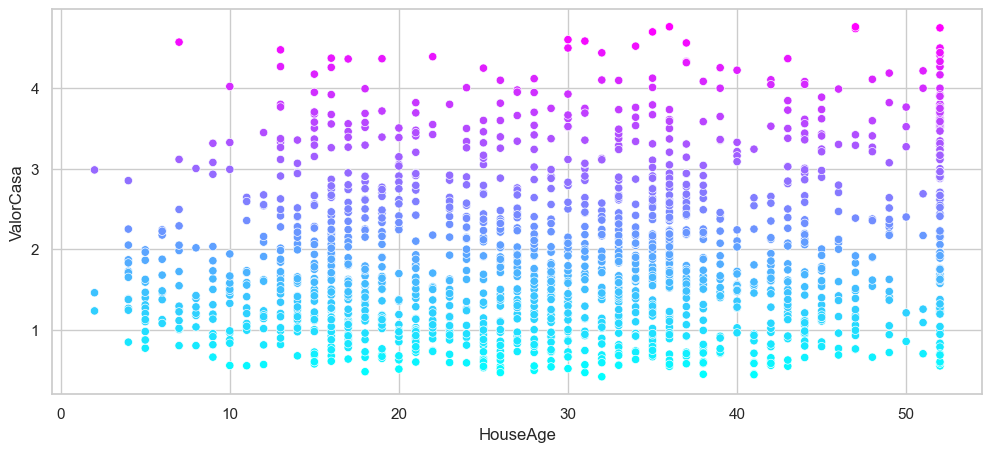

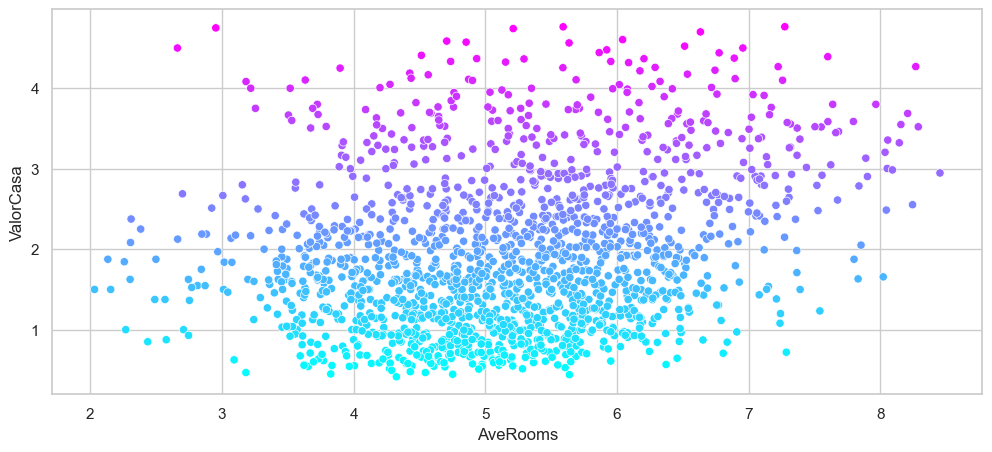

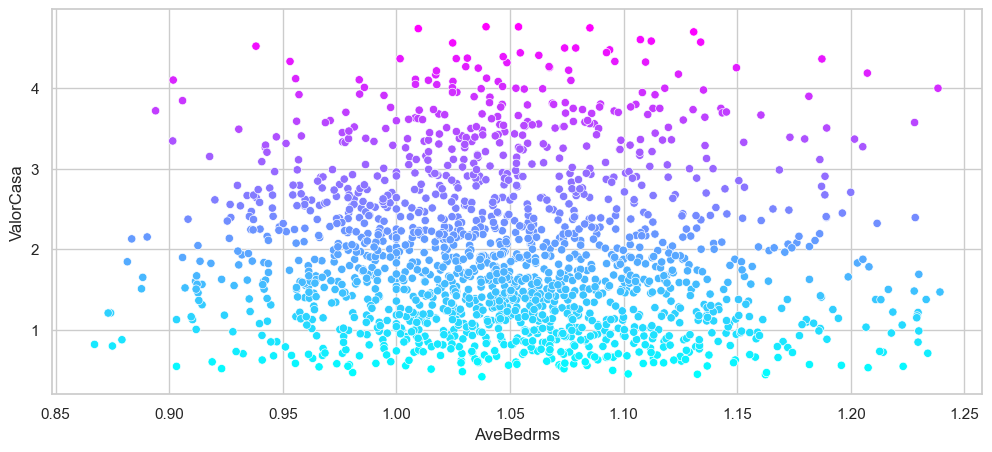

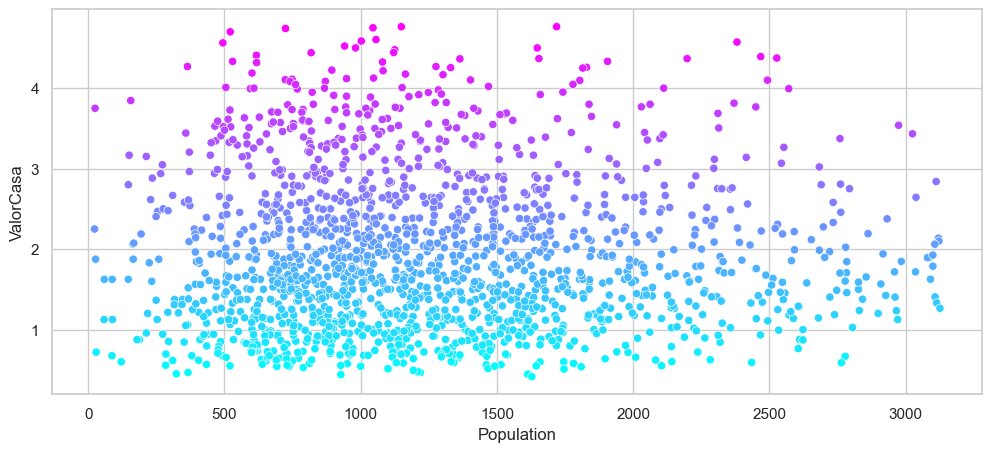

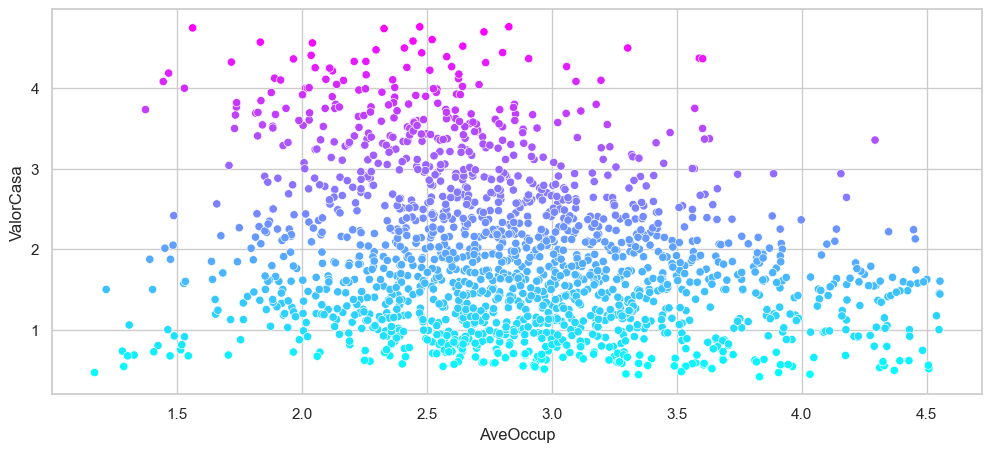

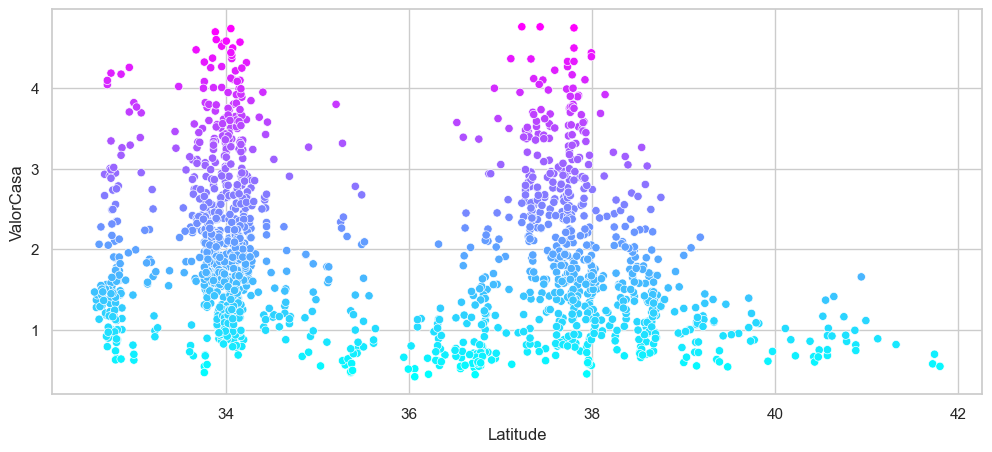

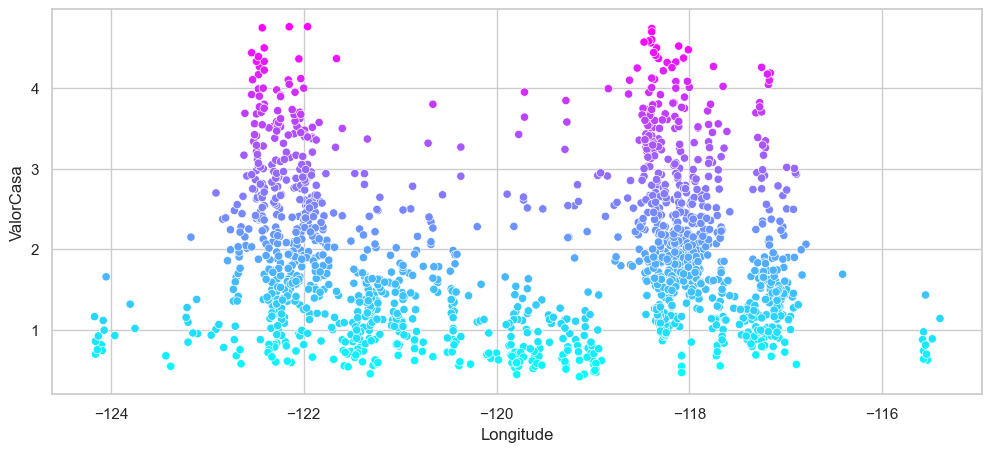

In [88]:
muestra_filtrada = california_filtrado.sample(frac=0.1,random_state=17)

for feature in california.feature_names:
    plt.figure(figsize=(12,5))
    sns.scatterplot(data=muestra_filtrada, x=feature, y='ValorCasa', hue='ValorCasa', palette='cool', legend=False)

### 15.5.4 Separar los datos para training y pruebas

Importa de sklearn.model_selection el train_test_split

In [89]:
from sklearn.model_selection import train_test_split

Arma tu train test split

In [90]:
X_train1, X_test1, ytrain1, y_test1 = train_test_split(california.data, california.target, random_state=11)

Filtrado outlayers

In [91]:
target_filtrado = california_filtrado['ValorCasa'].values

In [92]:
data_filtrada = california_filtrado[california.feature_names].values

In [93]:
X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(data_filtrada, target_filtrado, random_state=11)

Checa las figura de train

In [94]:
X_train1.shape

(15480, 8)

In [95]:
X_train_filter.shape

(12232, 8)

Checa la figura de test

In [96]:
X_test1.shape

(5160, 8)

In [97]:
X_test_filter.shape

(4078, 8)

### 15.5.5 Entrenar el modelo

Importa LinearRegression desde sklearn.linear_model

In [98]:
from sklearn.linear_model import LinearRegression

arma tu objeto reglin

In [99]:
reglin1 = LinearRegression()

In [100]:
reglin_filtrado = LinearRegression()

Haz el fit

In [101]:
reglin1.fit(X= X_train1, y=ytrain1)

LinearRegression()

In [102]:
reglin_filtrado.fit(X= X_train_filter, y=y_train_filter)

LinearRegression()

Arma tu for para enumerar todos los coeficientes

In [103]:
for i, feature in enumerate(california.feature_names):
    print(f'{feature:>10}: {reglin1.coef_[i]}')

    MedInc: 0.43770302153822116
  HouseAge: 0.009216834565797982
  AveRooms: -0.10732526637361
 AveBedrms: 0.6117133073918098
Population: -5.756822009291086e-06
  AveOccup: -0.0033845664657164375
  Latitude: -0.41948186096490647
 Longitude: -0.43377133498740145


In [104]:
for i, feature in enumerate(california.feature_names):
    print(f'{feature:>10}: {reglin_filtrado.coef_[i]}')

    MedInc: 0.4440249318100679
  HouseAge: 0.009957879876102244
  AveRooms: -0.11199475774433959
 AveBedrms: 1.2168385293121158
Population: 7.643031124811307e-05
  AveOccup: -0.37103954292913394
  Latitude: -0.3975779022165094
 Longitude: -0.3952672269691262


Obten el intercept

In [105]:
reglin1.intercept_

-36.88295065605549

In [106]:
reglin_filtrado.intercept_

-32.8208626757539

### 15.5.6  Probar el modelo

Arma tu prediccion

In [107]:
prediccion1 = reglin1.predict(X_test1)

In [108]:
prediccion_filtrado = reglin_filtrado.predict(X_test_filter)

Arma tu lista de valores esperados

In [109]:
esperado1 = y_test1

In [110]:
esperado_filtrado = y_test_filter

vamos a ver las primeras 5 predicciones

In [111]:
prediccion1[:5]*100

array([125.39687613, 234.69310726, 203.79474488, 187.01253958,
       253.60833933])

In [112]:
prediccion_filtrado[:5]*100

array([258.30893047, 195.5716138 , 286.28415301, 121.38951734,
       212.3756221 ])

vs los primeros 5 valores esperados

In [113]:
esperado1[:5]*100

array([ 76.2, 173.2, 112.5, 137. , 185.6])

In [114]:
esperado_filtrado[:5]*100

array([241. , 194.5, 356.5, 140.6, 225. ])

In [115]:
[((a-b)/b) for a,b in zip(prediccion1[:5]*100,esperado1[:5]*100)]

[0.6456282956187064,
 0.355041035015808,
 0.8115088434054643,
 0.3650550333947218,
 0.36642424208711283]

In [116]:
[((a-b)/b) for a,b in zip(prediccion_filtrado[:5]*100,esperado_filtrado[:5]*100)]

[0.07182128824282204,
 0.005509582508221867,
 -0.1969588975917181,
 -0.13663216688227217,
 -0.056108346240768645]

### 15.5.7  Visualizar los precios esperados vs predecidos

Arma un Dataframe vacio

In [117]:
df = pd.DataFrame()

In [118]:
df_filtrado = pd.DataFrame()

Agregale una columna con los precios esperados

In [119]:
df['Esperados'] = pd.Series(esperado1)

In [120]:
df_filtrado['Esperados_filtrado'] = pd.Series(esperado_filtrado)

Otra con los precios predichos

In [121]:
df['Prediccion'] = pd.Series(prediccion1)

In [122]:
df_filtrado['Prediccion_filtrado'] = pd.Series(prediccion_filtrado)

Arma una figura de plt

Metele un scatterplot de seaborn

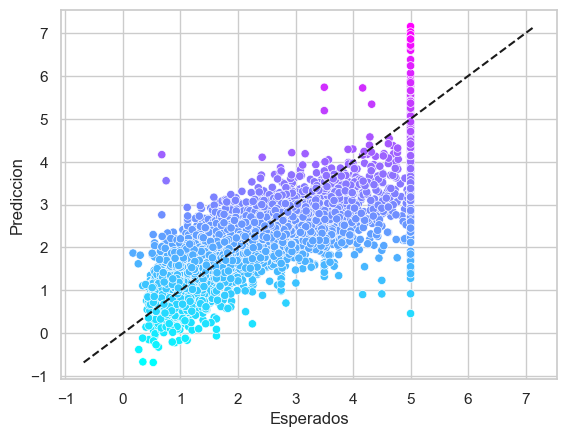

In [123]:
sns.scatterplot(data=df, x='Esperados', y='Prediccion', hue='Prediccion', palette='cool', legend=False)
start = min(esperado1.min(), prediccion1.min())
end = max(esperado1.max(), prediccion1.max())
plt.plot([start, end], [start, end], 'k--')
plt.show()

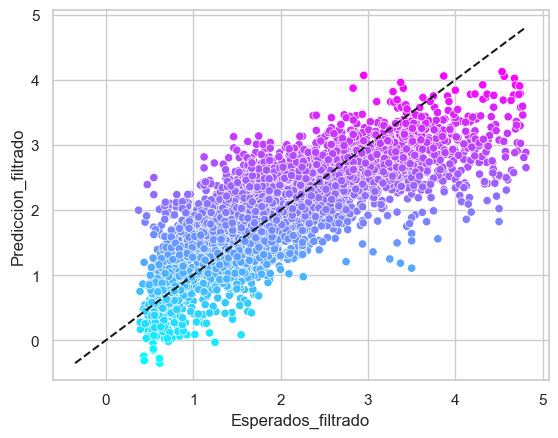

In [124]:
sns.scatterplot(data=df_filtrado, x='Esperados_filtrado', y='Prediccion_filtrado', hue='Prediccion_filtrado', palette='cool', legend=False)
start = min(esperado_filtrado.min(), prediccion_filtrado.min())
end = max(esperado_filtrado.max(), prediccion_filtrado.max())
plt.plot([start, end], [start, end], 'k--')
plt.show()

### 15.5.8  Métricas del modelo de regresión

Importa metrics de sklearn

In [125]:
from sklearn import metrics

Saca el r2

In [126]:
metrics.r2_score(esperado1, prediccion1)

0.6008983115964329

In [127]:
metrics.r2_score(esperado_filtrado, prediccion_filtrado)

0.6356658311865423

Saca el Mean Squared Error (Promedio de Errores Cuadrados)

In [128]:
metrics.mean_squared_error(esperado1, prediccion1)

0.5350149774449122

In [129]:
metrics.mean_squared_error(esperado_filtrado, prediccion_filtrado)

0.31883877505968394

### 15.5.9  Escoger el mejor modelo

In [130]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [131]:
estimadores = {'RegLin':LinearRegression(), 'ElasticNet':ElasticNet(), 'Lasso':Lasso(), 'Ridge':Ridge()}

In [132]:
from sklearn.model_selection import KFold, cross_val_score

In [133]:
for promest, object in estimadores.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    puntajes = cross_val_score(estimator=object, X=california.data, y=california.target, cv=kfold, scoring='r2')
    print(f'{promest:>16}:', f'Promedio de puntajes R2 = {puntajes.mean():.3f}')

          RegLin: Promedio de puntajes R2 = 0.599
      ElasticNet: Promedio de puntajes R2 = 0.423
           Lasso: Promedio de puntajes R2 = 0.285
           Ridge: Promedio de puntajes R2 = 0.599


## 15.6 Aprendizaje no supervisado parte 1

Importa load_digits (de nuevo) desde sklearn.datasets

In [134]:
from sklearn.datasets import load_digits

arma tu objeto load_digits

In [135]:
digits1 = load_digits()

Importa TSNE desde sklearn.manifold

In [136]:
from sklearn.manifold import TSNE

arma tu objeto tsne

In [137]:
tsne = TSNE(n_components=2, random_state=11)

Transforma tus datos al numero especifico de dimensiones y entrena al estimador

In [138]:
datos_reducidos = tsne.fit_transform(digits1.data)

Checa la forma de tus datos

In [139]:
datos_reducidos.shape

(1797, 2)

In [140]:
datos_reducidos

array([[ -2.752004 , -54.30888  ],
       [ 10.166616 ,  12.083832 ],
       [-14.085923 ,  19.312716 ],
       ...,
       [ -5.7490935,  11.2120695],
       [-21.143501 , -14.990327 ],
       [-14.396039 ,   7.384589 ]], dtype=float32)

Vamos a mostrar los datos uasndo el scatter de matplotlib, importa matplotlib

In [141]:
import matplotlib.pyplot as plt

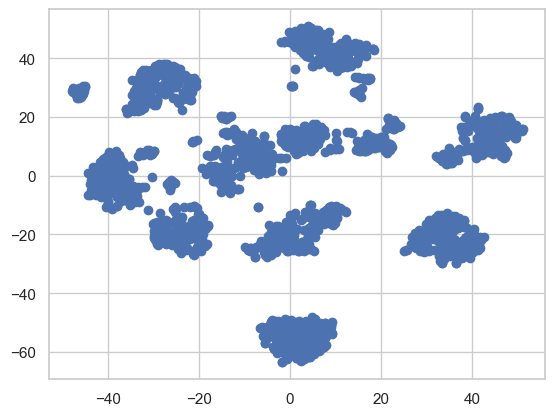

In [142]:
dots = plt.scatter(datos_reducidos[:,0], datos_reducidos[:,1])

Y el sacatter

Ahora haz el scatter con colores diferentes

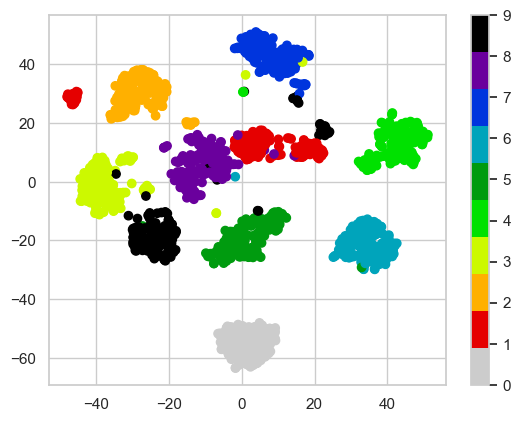

In [143]:
dots = plt.scatter(datos_reducidos[:,0], datos_reducidos[:,1], c=digits1.target, cmap=plt.get_cmap('nipy_spectral_r', 10))
colorbar = plt.colorbar(dots)

## 15.7 Aprendizaje no supervisado parte 2

### 15.7.1  Cargar el Dataset de Iris

Carga load_iris de sklearn.datasets

In [144]:
from sklearn.datasets import load_iris

Arma un objeto iris de load_iris

In [145]:
iris = load_iris()

Veamos la descripción del dataset

In [146]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Veamos la figura del iris.data

In [147]:
iris.data.shape

(150, 4)

La figura del iris.shape

In [148]:
iris.target.shape

(150,)

Conozcamos los posibles targets con target_names

In [149]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Y también los feature names

In [150]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 15.7.2  Explorar el dataset de Iris

Importamos pandas

In [151]:
import pandas as pd

Le decimos que maximo 5 columans

Y sin display width

Cargamos un dataframe con iris.data

In [152]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

Y le pegamos las especies que vienen de iris.target_names

In [153]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [154]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [155]:
iris_df['especie'] = [iris.target_names[i] for i in iris.target]

Checa el head del dataset

In [156]:
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       especie  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

Pon la precision de pandas a 2 decimales

Armate un describe del dataframe

In [157]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           150.0000          150.0000           150.0000   
mean              5.8433            3.0573             3.7580   
std               0.8281            0.4359             1.7653   
min               4.3000            2.0000             1.0000   
25%               5.1000            2.8000             1.6000   
50%               5.8000            3.0000             4.3500   
75%               6.4000            3.3000             5.1000   
max               7.9000            4.4000             6.9000   

       petal width (cm)  
count          150.0000  
mean             1.1993  
std              0.7622  
min              0.1000  
25%              0.3000  
50%              1.3000  
75%              1.8000  
max              2.5000

Y un describe de la columna de species solamente

In [158]:
iris_df['especie'].describe()

count        150
unique         3
top       setosa
freq          50
Name: especie, dtype: object

### 15.7.3  Visualizar el Dataset con Pairplot

Importa seaborn si no lo has hecho

In [159]:
import seaborn as sns

Cambia la fuente a 1.1

Ponlo estilo whitegrid

In [160]:
sns.set_style('whitegrid')

Arma tu pairplot en un objeto llamado cuadricula

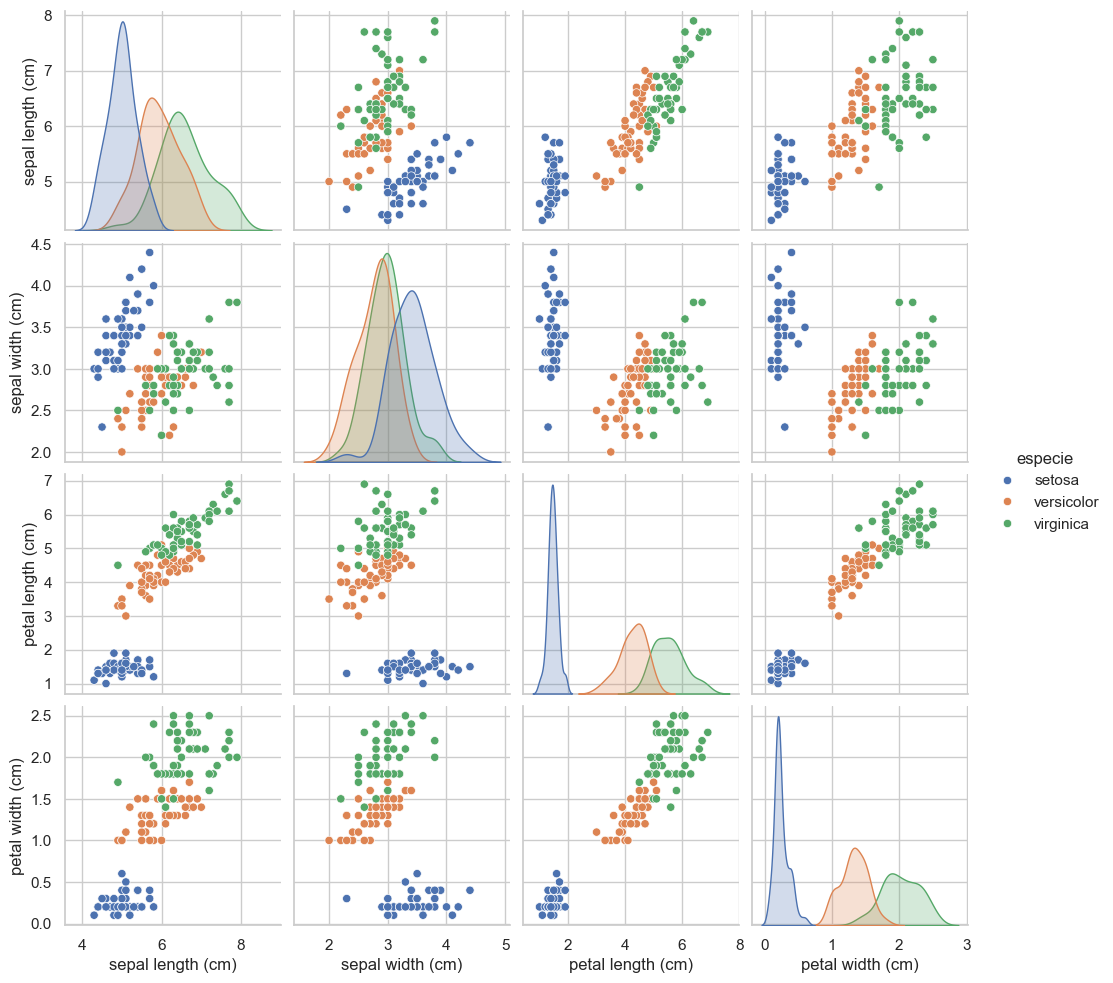

In [161]:
cuadricula = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue='especie')

Ahora mostremos el pairplot en un solo color

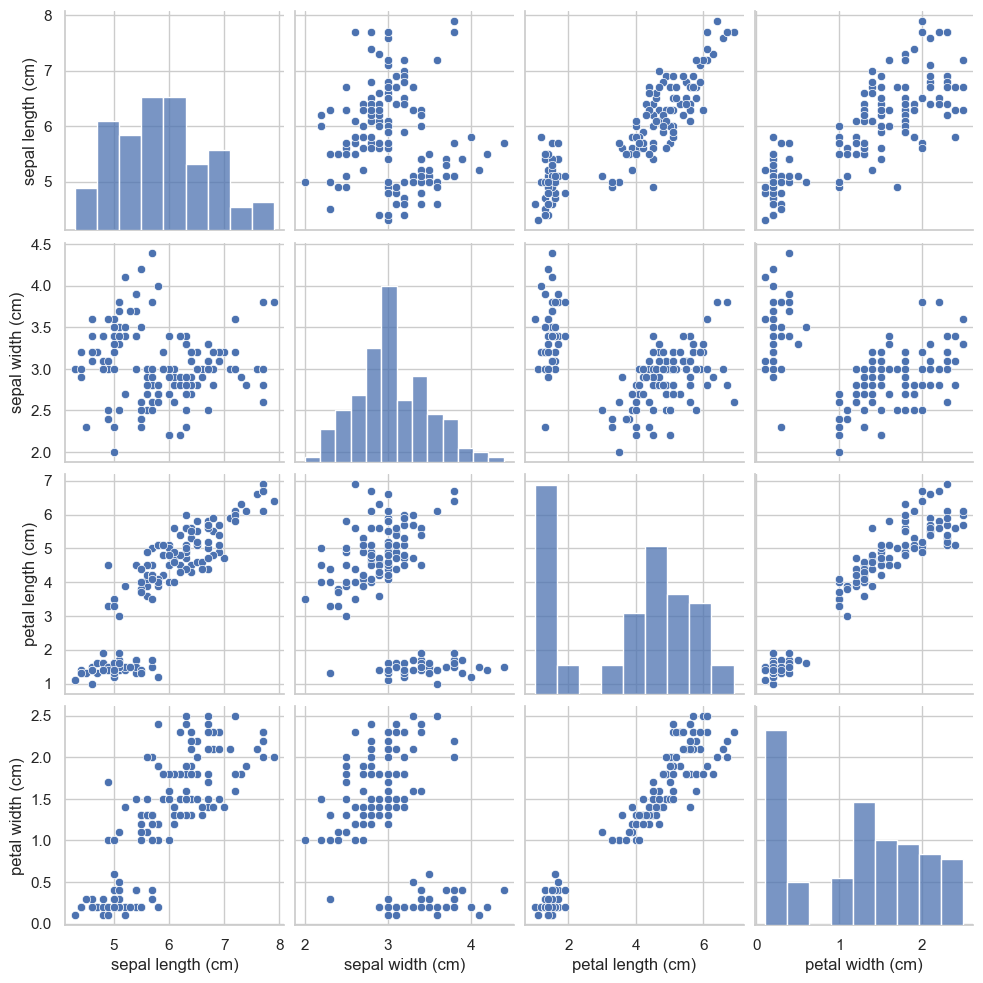

In [162]:
cuadricula = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4])

### 15.7.4  Usar un estimador KMeans

Vamos a importar Kmeans desde sklearn.cluster

In [163]:
from sklearn.cluster import KMeans

Ahora creamos el estimador

In [164]:
kmeans = KMeans(n_clusters=3, random_state=11)

Entrenamos el modelo con el metodo .fit

In [165]:
kmeans.fit(iris.data)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=11)

Imprimimos los primeros 50 resultados

In [166]:
print(kmeans.labels_[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Ahora los segundos 50

In [167]:
print(kmeans.labels_[50:100])

[2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Y los ultimos 50

In [168]:
print(kmeans.labels_[100:150])

[2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]


### 15.7.4  Reducción de dimensionalidad con PCA

Importa PCA de sklearn.decomposition

In [169]:
from sklearn.decomposition import PCA

Arma tu estimador PCA

In [170]:
pca = PCA(n_components=2, random_state=11)

Arma el fit

In [171]:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

Y luego transforma los datos usando transform

In [172]:
iris_pca = pca.transform(iris.data)

checa la figura de los datos que devolvió

In [173]:
iris_pca.shape

(150, 2)

Veamos losd datos reducidos, pasa esos nuevos datos a un dataframe

In [174]:
iris_pca_df = pd.DataFrame(iris_pca, columns=['Componente1', 'Componente2'])

pegale la especie a ese dataframe

In [175]:
iris_pca_df['especie'] = iris_df['especie']

arma un scatterplot en seaborn

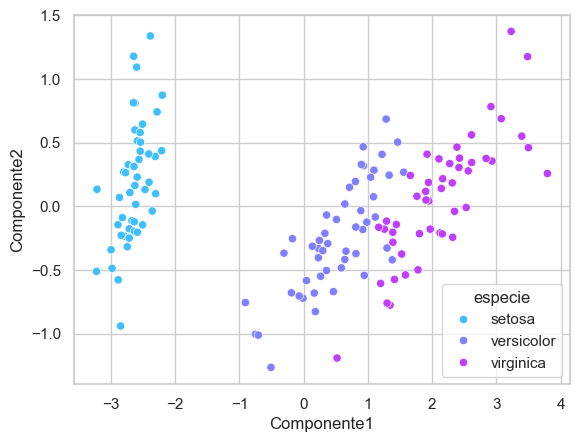

In [176]:
axes = sns.scatterplot(data=iris_pca_df, x='Componente1', y='Componente2', hue='especie', legend='brief', palette='cool')

Vamos armando un objeto centroide para mostrar en seaborn

In [177]:
iris_centro = pca.transform(kmeans.cluster_centers_)

importa matplotlib

In [178]:
import matplotlib.pyplot as plt

Muestra los scatter

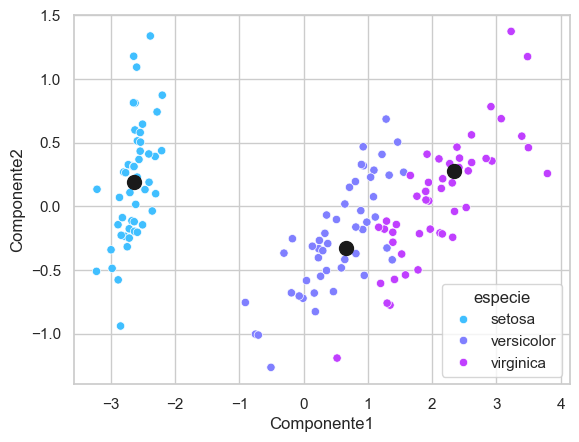

In [179]:
axes = sns.scatterplot(data=iris_pca_df, x='Componente1', y='Componente2', hue='especie', legend='brief', palette='cool')

dots = plt.scatter(iris_centro[:,0], iris_centro[:,1], s=100, c='k')

### 15.7.4  Escoger el mejor estimador de CLustering

importa DBSCAN, Meanshift, spectral clustering, agglomerative clustering

In [180]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering

Arma un diccionario con los estimadores

In [182]:
estimadores = {'KMeans':kmeans, 'DBSCAN':DBSCAN(), 'MeanShift':MeanShift(), 'SpectralClustering':SpectralClustering(n_clusters=3), 'AgglomerativeClustering':AgglomerativeClustering(n_clusters=3)}

importa Numpy as np

In [183]:
import numpy as np

arma el for que va a hacer los estimadores

In [184]:
for n,e in estimadores.items():
    e.fit(iris.data)
    print(f"\n{n}:")
    for i in range(0,101,50):
        etiquetas,cuentas = np.unique(e.labels_[i:i+50],return_counts=True)
        print(f"{i}-{i+50}:")
        for etiqueta, cuenta in zip(etiquetas, cuentas):
            print(f" etiqueta={etiqueta}, cuenta={cuenta}")

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



KMeans:
0-50:
 etiqueta=0, cuenta=50
50-100:
 etiqueta=1, cuenta=47
 etiqueta=2, cuenta=3
100-150:
 etiqueta=1, cuenta=14
 etiqueta=2, cuenta=36

DBSCAN:
0-50:
 etiqueta=-1, cuenta=1
 etiqueta=0, cuenta=49
50-100:
 etiqueta=-1, cuenta=6
 etiqueta=1, cuenta=44
100-150:
 etiqueta=-1, cuenta=10
 etiqueta=1, cuenta=40

MeanShift:
0-50:
 etiqueta=1, cuenta=50
50-100:
 etiqueta=0, cuenta=49
 etiqueta=1, cuenta=1
100-150:
 etiqueta=0, cuenta=50

SpectralClustering:
0-50:
 etiqueta=1, cuenta=50
50-100:
 etiqueta=0, cuenta=50
100-150:
 etiqueta=0, cuenta=15
 etiqueta=2, cuenta=35

AgglomerativeClustering:
0-50:
 etiqueta=1, cuenta=50
50-100:
 etiqueta=0, cuenta=49
 etiqueta=2, cuenta=1
100-150:
 etiqueta=0, cuenta=15
 etiqueta=2, cuenta=35


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
